# Reviews-Based Yelp Award Project
# *Data Cleaning and Classification*

**Alison Glazer**

This project is a conceptual idea for a new Yelp award that is driven by the content of a business's Yelp reviews. The initial prototype focuses on high-end restaurants in California, and the California Michelin Guide is used as a proxy for a judging criterion. 

This notebook contains data cleaning, analysis, and construction of the classification model used to determine restaurants that would win the award.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><span><a href="#Add-NLP-Features-to-main-DF" data-toc-modified-id="Add-NLP-Features-to-main-DF-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Add NLP Features to main DF</a></span></li></ul></li><li><span><a href="#Clean-Data-and-Set-Up-for-Modeling" data-toc-modified-id="Clean-Data-and-Set-Up-for-Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Clean Data and Set Up for Modeling</a></span><ul class="toc-item"><li><span><a href="#Location" data-toc-modified-id="Location-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Location</a></span></li><li><span><a href="#Restaurant-Categories" data-toc-modified-id="Restaurant-Categories-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Restaurant Categories</a></span></li><li><span><a href="#Other-Restaurant-Info" data-toc-modified-id="Other-Restaurant-Info-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Other Restaurant Info</a></span></li><li><span><a href="#Add-Michelin-Data" data-toc-modified-id="Add-Michelin-Data-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Add Michelin Data</a></span></li><li><span><a href="#Get-latitude-and-longitude-(Uncomment-cells-if-generating-lat/long-data)" data-toc-modified-id="Get-latitude-and-longitude-(Uncomment-cells-if-generating-lat/long-data)-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Get latitude and longitude (Uncomment cells if generating lat/long data)</a></span></li></ul></li><li><span><a href="#Classification-Set-Up" data-toc-modified-id="Classification-Set-Up-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Classification Set Up</a></span><ul class="toc-item"><li><span><a href="#Train-Test-Split-&amp;-Standardize" data-toc-modified-id="Train-Test-Split-&amp;-Standardize-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Train Test Split &amp; Standardize</a></span></li><li><span><a href="#Helper-Functions-for-Evaluating-Models" data-toc-modified-id="Helper-Functions-for-Evaluating-Models-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Helper Functions for Evaluating Models</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>XGBoost</a></span></li></ul></li><li><span><a href="#Model-Comparison" data-toc-modified-id="Model-Comparison-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Comparison</a></span></li><li><span><a href="#Modeling-with-Upsampling" data-toc-modified-id="Modeling-with-Upsampling-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Modeling with Upsampling</a></span><ul class="toc-item"><li><span><a href="#Upsample-with-Random-Oversampling" data-toc-modified-id="Upsample-with-Random-Oversampling-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Upsample with Random Oversampling</a></span></li><li><span><a href="#Logistic-Regression-with-Random-Upsampling" data-toc-modified-id="Logistic-Regression-with-Random-Upsampling-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Logistic Regression with Random Upsampling</a></span></li><li><span><a href="#XGBoost-with-Random-Oversampling" data-toc-modified-id="XGBoost-with-Random-Oversampling-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>XGBoost with Random Oversampling</a></span></li><li><span><a href="#Upsample-with-SMOTE" data-toc-modified-id="Upsample-with-SMOTE-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Upsample with SMOTE</a></span></li><li><span><a href="#Logistic-Regression-with-SMOTE" data-toc-modified-id="Logistic-Regression-with-SMOTE-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Logistic Regression with SMOTE</a></span></li><li><span><a href="#XGBoost-with-SMOTE" data-toc-modified-id="XGBoost-with-SMOTE-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>XGBoost with SMOTE</a></span></li><li><span><a href="#Upsample-with-ADASYN" data-toc-modified-id="Upsample-with-ADASYN-7.7"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>Upsample with ADASYN</a></span></li><li><span><a href="#Logistic-Regression-with-ADASYN" data-toc-modified-id="Logistic-Regression-with-ADASYN-7.8"><span class="toc-item-num">7.8&nbsp;&nbsp;</span>Logistic Regression with ADASYN</a></span></li><li><span><a href="#XGBoost-with-ADASYN" data-toc-modified-id="XGBoost-with-ADASYN-7.9"><span class="toc-item-num">7.9&nbsp;&nbsp;</span>XGBoost with ADASYN</a></span></li><li><span><a href="#Upsampled-Model-Comparison" data-toc-modified-id="Upsampled-Model-Comparison-7.10"><span class="toc-item-num">7.10&nbsp;&nbsp;</span>Upsampled Model Comparison</a></span></li></ul></li><li><span><a href="#Tuning-and-Cross-Validating-the-Models" data-toc-modified-id="Tuning-and-Cross-Validating-the-Models-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Tuning and Cross-Validating the Models</a></span><ul class="toc-item"><li><span><a href="#Tuning-XGBoost" data-toc-modified-id="Tuning-XGBoost-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Tuning XGBoost</a></span></li></ul></li><li><span><a href="#SANDBOX" data-toc-modified-id="SANDBOX-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>SANDBOX</a></span><ul class="toc-item"><li><span><a href="#Classify-with-Neural-Networks" data-toc-modified-id="Classify-with-Neural-Networks-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Classify with Neural Networks</a></span></li><li><span><a href="#Example-for-Presenting-Concept" data-toc-modified-id="Example-for-Presenting-Concept-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Example for Presenting Concept</a></span></li></ul></li></ul></div>

<a id="libs"></a>
## Import Libraries

In [759]:
# EDA
import re
import string
import numpy as np
import pandas as pd
import datetime as dt

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Oswald']
font = {'size': 12}
plt.rc('font', **font)
from geopy.geocoders import Nominatim

# Modeling
from sklearn.model_selection import \
    train_test_split, GridSearchCV, KFold, cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_score, recall_score,\
precision_recall_curve,f1_score, fbeta_score,\
accuracy_score, confusion_matrix, roc_auc_score, roc_curve, make_scorer
from xgboost import XGBClassifier
import shap
import keras

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# Load/Save
import pickle
import joblib

<a id='load'></a>
## Load Data

- Read in Yelp profile data for high-end restaurants in California
- Read in list of restaurants from California Michelin Guide

In [614]:
# Restaurant Yelp Profile Information
with open('data/ca_restaurants.pkl', 'rb') as read_file:
    df = pickle.load(read_file)

In [615]:
# Number of restaurants, number of columns
df.shape

(2371, 30)

In [616]:
# Michelin Star Restaurants Datasets
with open('data/michelin_restaurants_yelp.pkl', 'rb') as read_file:
    mich_df = pickle.load(read_file)

with open('data/michelin_scrape_restaurants.pkl', 'rb') as read_file:
    mich_scrape_df = pickle.load(read_file)

one_star_df = pd.read_csv('data/one-star-michelin-restaurants.csv')
two_star_df = pd.read_csv('data/two-stars-michelin-restaurants.csv')
three_star_df = pd.read_csv('data/three-stars-michelin-restaurants.csv')

In [617]:
# Features produced with topic modeling for each restaurant from its reviews
with open('data/lsa_t_feats3.pkl', 'rb') as read_file:
    topic_feats = pickle.load(read_file)

In [618]:
df.sample()

,restaurantID,name,location,reviewCount,rating,categories,address,Hours,GoodforKids,AcceptsCreditCards,...,GoodFor,Alcohol,NoiseLevel,Ambience,HasTV,Caters,WheelchairAccessible,webSite,phoneNumber,filReviewCount
1207,APNuK7r7POV-3VHgkmTsIQ,Chaya Brasserie,"Chaya Brasserie - Mid-City West - Los Angeles, CA",339,4.0,"Restaurants, Asian Fusion, METADATA","8741 Alden Dr Los Angeles, CA 90048 Neighborho...",Mon-Fri 11:30 am - 2:30 pm Mon-Sat 5:30 pm - 1...,No,Yes,...,Dinner,Full Bar,Average,"Romantic, Classy, Trendy",No,No,Yes,http://www.thechaya.com,(310) 859-8833,42


In [619]:
# Delete unnecessary columns
del df['Hours']
del df['phoneNumber']
del df['webSite']

### Add NLP Features to main DF
- Read in NLP analysis from other notebook

In [621]:
df = df.merge(topic_feats, how='left', on='restaurantID')

In [622]:
df.to_pickle('data/feats_and_nlp.pkl')

<a id="clean"></a>
## Clean Data and Set Up for Modeling

<a id='loc'></a>
### Location

- Put cities and states representing small percentages of the restaurants into an "other" category
- Create indicator variable for restaurants that are in "major" cities (capitals and huge tourist destinations)

In [623]:
# Clean up location column
df.location = df.location.str.split('-')  # Split strings into lists
df.location = pd.Series([sublist[1:] for sublist in list(df.location)
                         ])  # Remove restaurant name from location
df.location = pd.Series(
    map(lambda sublist: [x.strip() for x in sublist],
        list(df.location)))  # Strip leading and trailing whitespaces
open_index = [
    idx for idx, x in enumerate(list(df.location)) if x[0] != 'CLOSED'
]  # Remove all restaurants that have shut down
df = df.iloc[open_index, :].reset_index()
del df['index']
df.location = pd.Series(
    map(lambda sublist: [x.strip() for x in sublist],
        [sublist[-1].split(',') for sublist in list(df.location)
         ]))  # Only keep city and state information

In [624]:
# Create city and state columns
df['city'] = [x[0] for x in df.location]
df['state'] = [x[-1] for x in list(df.location)]
del df['location']

In [625]:
# Clean up city column
df.city.iloc[df[df.city == 'san Sebastian'].index] = 'San Sebastian'

/anaconda3/envs/metis/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [626]:
# Create indicator variable for major cities
major_cities = [
    'Portland', 'Chicago', 'Las Vegas', 'New York', 'Montreal',
    'San Francisco', 'Washington', 'Baltimore', 'Honolulu', 'Minneapolis',
    'Indianapolis', 'Los Angeles', 'Philadelphia', 'Atlanta', 'Seattle',
    'Beverly Hills', 'Austin', 'Boston', 'New Orleans', 'Paris', 'Roma',
    'Cleveland', 'Phoenix', 'Hollywood', 'Denver', 'Cincinnati', 'Dallas',
    'Salt Lake City', 'Louisville'
]
df['major_city'] = [1 if x in major_cities else 0 for x in df.city]

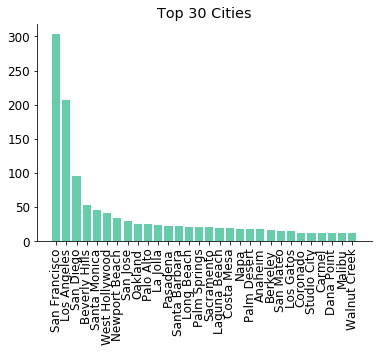

In [627]:
# Now look at cities
city_dist = df.groupby('city').size().sort_values(ascending=False)
plt.bar(city_dist[0:30].index,
        height=city_dist[0:30].values,
        color='mediumaquamarine')
plt.xticks(rotation=90)
sns.despine()
plt.title('Top 30 Cities')

In [628]:
# States with more than 15 restaurants
top_cities = df.groupby('city').size() >= 15

# Restaurants from states with less than 15 restaurants go to 'other'
df['city'] = df.city.apply(lambda x: x if top_cities[x] else '0_other_city')

In [629]:
# Create dummy variables for city and state

df = df.merge(pd.get_dummies(df.state, prefix='state', drop_first=True),
              left_index=True,
              right_index=True)
df = df.merge(pd.get_dummies(df.city, prefix='city', drop_first=True),
              left_index=True,
              right_index=True)

<a id="cats"></a>
### Restaurant Categories
All restaurants have "Restaurants" as the first category, so take the 2nd category for each as its actual category

In [630]:
# Clean up location column
df['category'] = df.categories.str.split(',')  # Split strings into lists
df.category = pd.Series([sublist[1] for sublist in list(df.category)
                         ])  # Keep only the element at index 1
df.category = pd.Series(map(lambda x: x.strip(), list(df.category)))

In [631]:
# Only keep categories with more than 10 restaurants, put the rest into an "Other" category
top_categories = df.groupby('category').size() >= 10

# Categories with less than 15 restaurants go to 'other'
df['category'] = df.category.apply(
    lambda x: x if top_categories[x] else '0_other_category')

**Clean up data - get rid of hotels**
Some listings in the dataset are actually hotels were included because of being listed lastly as a restaurant. We are only focused on restaurants that are not hotel-restaurants. Drop these from the dataframe

In [632]:
# df = df[df.category!='Hotels']

In [633]:
# df.shape

In [634]:
# df.reset_index(drop=True,inplace=True)

**Make category dummy variables**

In [635]:
# Make dummy variables for restaurant category
df = df.merge(pd.get_dummies(df.category, prefix='cat', drop_first=True),
              left_index=True,
              right_index=True)

<a id='other'></a>
### Other Restaurant Info
Process other information for each restaurant into a form that is usable in the classification models. Replace "Yes" and "No" values with 1 and 0, create dummy variables for categorical variables

In [636]:
# Good for kids:
df.GoodforKids.unique()

array(['No', 'Yes', None], dtype=object)

In [637]:
df['goodforkids_bin'] = [1 if x == 'Yes' else 0 for x in df.GoodforKids]

In [638]:
# Good for groups:
df.GoodforGroups.unique()

array(['Yes', 'No', None], dtype=object)

In [639]:
df['goodforgroups_bin'] = [1 if x == 'Yes' else 0 for x in df.GoodforGroups]

In [640]:
# Accepts credit cards:
df.AcceptsCreditCards.unique()

array(['Yes', None, 'No'], dtype=object)

In [641]:
df['acceptscc_bin'] = [1 if x == 'Yes' else 0 for x in df.AcceptsCreditCards]

In [642]:
# Parking
# Fill all na's with Street Parking
df.Parking.fillna('Street', inplace=True)

# Set up categorical values for parking as street parking, 
# valet, and self-park/private lot for one-hot encoding
parking_cat = []
for x in df.Parking:
    if "Valet" in x:
        parking_cat.append('valet')
    elif x == 'Street':
        parking_cat.append('0street')
    else:
        parking_cat.append('self_park')

df['parking_cat'] = parking_cat

In [643]:
# Attire
# Assume that unlisted attire is casual
df.Attire.fillna('Casual', inplace=True)
df.Attire.value_counts()

Casual                      1315
Dressy                       620
Formal (Jacket Required)       9
Name: Attire, dtype: int64

In [644]:
df['fancy_bin'] = [0 if x == 'Casual' else 1 for x in df.Attire]

In [645]:
# Price
df.PriceRange.fillna('Unknown')

# Set up categorical values for price as highest, high, and low for one-hot encoding
price_cat = []
for x in df.PriceRange:
    if x in ['$$$$', 'Â£Â£Â£Â£', 'â¬â¬â¬â¬']:
        price_cat.append('highest')
    elif x in ['$$$', 'Â£Â£Â£', 'â¬â¬â¬']:
        price_cat.append('high')
    else:
        price_cat.append('0low')

df['price_cat'] = price_cat

In [646]:
# Reservations
df.TakesReservations.unique()

array(['Yes', 'No', None], dtype=object)

In [647]:
df['reserv_bin'] = [1 if x == 'Yes' else 0 for x in df.TakesReservations]

In [648]:
# Takeout
df.Takeout.unique()

array(['No', 'Yes', None], dtype=object)

In [649]:
df['takeout_bin'] = [1 if x == 'Yes' else 0 for x in df.Takeout]

In [650]:
# Delivery
df.Delivery.unique()

array(['No', 'Yes', None], dtype=object)

In [651]:
df['delivery_bin'] = [1 if x == 'Yes' else 0 for x in df.Delivery]

In [652]:
# WaiterService
df.WaiterService.unique()

array(['Yes', 'No', None], dtype=object)

In [653]:
df['waiter_bin'] = [1 if x == 'Yes' else 0 for x in df.WaiterService]

In [654]:
# Outdoor Seating
df.OutdoorSeating.unique()

array(['Yes', 'No', None], dtype=object)

In [655]:
df['outdoor_bin'] = [1 if x == 'Yes' else 0 for x in df.OutdoorSeating]

In [656]:
# Free WiFi
df.WiFi.unique()

array([None, 'No', 'Free', 'Paid'], dtype=object)

In [657]:
df['wifi_bin'] = [1 if x == 'Free' else 0 for x in df.WiFi]

In [658]:
# Alcohol
df.Alcohol.fillna('No', inplace=True)
df.Alcohol.unique()

array(['Full Bar', 'Beer & Wine Only', 'No'], dtype=object)

In [659]:
# Set up alcohol values for one-hot encoding
df.Alcohol.iloc[df[df.Alcohol == 'Beer & Wine Only'].index] = 'beer_wine'
df.Alcohol.iloc[df[df.Alcohol == 'Full Bar'].index] = 'full_bar'
df.Alcohol.iloc[df[df.Alcohol == 'No'].index] = '0no_alc'

In [660]:
# Noise Level
df.NoiseLevel.fillna('Average', inplace=True)
df.NoiseLevel.value_counts()

Average      1370
Quiet         426
Loud           86
Very Loud      62
Name: NoiseLevel, dtype: int64

In [661]:
# Set up noise values for one-hot encoding
df.NoiseLevel.iloc[df[df.NoiseLevel == 'Average'].index] = '0avg_noise'
df.NoiseLevel.iloc[df[df.NoiseLevel == 'Quiet'].index] = 'quiet'
df.NoiseLevel.iloc[df[df.NoiseLevel == 'Loud'].index] = 'loud'
df.NoiseLevel.iloc[df[df.NoiseLevel == 'Very Loud'].index] = 'loud'

In [662]:
# Has TV
df.HasTV.fillna('No', inplace=True)
df.HasTV.unique()

array(['No', 'Yes'], dtype=object)

In [663]:
df['tv_bin'] = [1 if x == 'Yes' else 0 for x in df.HasTV]

In [664]:
# Caters
df.Caters.fillna('No', inplace=True)
df.Caters.unique()

array(['No', 'Yes'], dtype=object)

In [665]:
df['caters_bin'] = [1 if x == 'Yes' else 0 for x in df.Caters]

In [666]:
# Wheelchair Accessible
df.WheelchairAccessible.fillna('No', inplace=True)
df.WheelchairAccessible.unique()

array(['No', 'Yes'], dtype=object)

In [667]:
df['wheelchair_bin'] = [
    1 if x == 'Yes' else 0 for x in df.WheelchairAccessible
]

In [668]:
print('======Restaurant Breakdown======')
print((100 * df.groupby('goodforkids_bin').size()[1] / df.shape[0]).round(2),
      '% of restaurants are good for kids')
print((100 * df.groupby('goodforgroups_bin').size()[1] / df.shape[0]).round(2),
      '% of restaurants are good for groups')
print((100 * df.groupby('acceptscc_bin').size()[1] / df.shape[0]).round(2),
      '% of restaurants accept credit cards')
parking_dist = df.groupby('parking_cat').size()
print((100 * parking_dist['self_park'] / df.shape[0]).round(2),
      '% of restaurants have private lots,',
      (100 * parking_dist['0street'] / df.shape[0]).round(2),
      '% of restaurants use street parking, and ',
      (100 * parking_dist['valet'] / df.shape[0]).round(2),
      '% of restaurants use valet parking')
print((100 * df.groupby('fancy_bin').size()[1] / df.shape[0]).round(2),
      '% of restaurants recommend fancy attire')
price_dist = df.groupby('price_cat').size()
print((100 * price_dist['highest'] / df.shape[0]).round(2),
      '% of restaurants are $$$$, and ',
      (100 * price_dist['high'] / df.shape[0]).round(2),
      '% of restaurants are $$$')
print((100 * df.groupby('reserv_bin').size()[1] / df.shape[0]).round(2),
      '% of restaurants take reservations')
print((100 * df.groupby('takeout_bin').size()[1] / df.shape[0]).round(2),
      '% of restaurants offer takeout orders')
print((100 * df.groupby('delivery_bin').size()[1] / df.shape[0]).round(2),
      '% of restaurants do deliveries')
print((100 * df.groupby('waiter_bin').size()[1] / df.shape[0]).round(2),
      '% of restaurants have waiter service')
print((100 * df.groupby('outdoor_bin').size()[1] / df.shape[0]).round(2),
      '% of restaurants have outdoor seating')
print((100 * df.groupby('wifi_bin').size()[1] / df.shape[0]).round(2),
      '% of restaurants have free wifi')
alc_dist = df.groupby('Alcohol').size()
print((100 * alc_dist['full_bar'] / df.shape[0]).round(2),
      '% of restaurants have full bars,',
      (100 * alc_dist['beer_wine'] / df.shape[0]).round(2),
      '% of restaurants serve beer and wine, and ',
      (100 * alc_dist['0no_alc'] / df.shape[0]).round(2),
      '% of restaurants don\'t serve alcohol')
noise_dist = df.groupby('NoiseLevel').size()
print((100 * noise_dist['0avg_noise'] / df.shape[0]).round(2),
      '% of restaurants have average noise levels,',
      (100 * noise_dist['loud'] / df.shape[0]).round(2),
      '% of restaurants are loud, and ',
      (100 * noise_dist['quiet'] / df.shape[0]).round(2),
      '% of restaurants are quiet')
print((100 * df.groupby('tv_bin').size()[1] / df.shape[0]).round(2),
      '% of restaurants have TV')
print((100 * df.groupby('caters_bin').size()[1] / df.shape[0]).round(2),
      '% of restaurants offer catering')
print((100 * df.groupby('wheelchair_bin').size()[1] / df.shape[0]).round(2),
      '% of restaurants are wheelchair accessible')

======Restaurant Breakdown======
17.9 % of restaurants are good for kids
85.6 % of restaurants are good for groups
98.87 % of restaurants accept credit cards
34.0 % of restaurants have private lots, 31.53 % of restaurants use street parking, and  34.47 % of restaurants use valet parking
32.36 % of restaurants recommend fancy attire
14.35 % of restaurants are $$$$, and  85.65 % of restaurants are $$$
92.75 % of restaurants take reservations
54.37 % of restaurants offer takeout orders
2.62 % of restaurants do deliveries
95.88 % of restaurants have waiter service
50.93 % of restaurants have outdoor seating
15.74 % of restaurants have free wifi
75.26 % of restaurants have full bars, 21.09 % of restaurants serve beer and wine, and  3.65 % of restaurants don't serve alcohol
70.47 % of restaurants have average noise levels, 7.61 % of restaurants are loud, and  21.91 % of restaurants are quiet
35.29 % of restaurants have TV
24.13 % of restaurants offer catering
87.76 % of restaurants are wheel

In [669]:
# Get dummy variables for categorical columns
df = df.merge(pd.get_dummies(df.parking_cat, prefix='parking',
                             drop_first=True),
              left_index=True,
              right_index=True)
df = df.merge(pd.get_dummies(df.price_cat, prefix='price', drop_first=True),
              left_index=True,
              right_index=True)
df = df.merge(pd.get_dummies(df.Alcohol, prefix='alc', drop_first=True),
              left_index=True,
              right_index=True)
df = df.merge(pd.get_dummies(df.NoiseLevel, prefix='noise', drop_first=True),
              left_index=True,
              right_index=True)

In [671]:
df.to_pickle('data/ca_restaurants_clean.pkl')

<a id='mich'></a>
### Add Michelin Data

In [672]:
michelin_restaurants = list(one_star_df.name) + list(two_star_df.name) + list(
    three_star_df.name)

In [673]:
# Add in the rest of the restaurants from scraping
# the california michelin guide
michelin_restaurants = list(set(list(mich_scrape_df) + michelin_restaurants))

In [674]:
# Remove punctuation and white spaces from names
def preprocess(docs):
    """
    Preprocess a Series of strings
    - remove numbers and punctuation
    - remove urls
    - convert all text to lower case
    """
    # Remove numbers and punctuation
    alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

    # Convert all text to lowercase
    punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ',
                                  x.lower())

    # Remove all image links
    image_link = lambda x: re.sub('http.*?¦', ' ', x)

    return docs.map(alphanumeric).map(punc_lower)

In [675]:
df['processed_name'] = preprocess(df.name)

In [676]:
processed_michelin_restaurants = list(
    preprocess(pd.Series(michelin_restaurants)))

In [677]:
# Create column in df
df['michelin_star'] = [
    1 if x in processed_michelin_restaurants else 0 for x in df.processed_name
]

In [678]:
df.michelin_star.value_counts()

0    1792
1     152
Name: michelin_star, dtype: int64

In [679]:
df[df.michelin_star == 1].city.value_counts()

0_other_city      48
San Francisco     46
Los Angeles       21
Beverly Hills      5
Santa Monica       5
West Hollywood     5
Napa               4
Pasadena           2
Los Gatos          2
Oakland            2
San Mateo          2
Santa Barbara      2
San Diego          2
Palo Alto          1
La Jolla           1
Costa Mesa         1
San Jose           1
Newport Beach      1
Berkeley           1
Name: city, dtype: int64

<a id='lat'></a>
### Get latitude and longitude (Uncomment cells if generating lat/long data)
Format address column into usable form for geopy

In [680]:
df.address[1]

'557 Valencia St (between 16th St & 17th St) San Francisco, CA 94110 Neighborhood: Mission'

In [681]:
# Cut out text in parentheses
formatted_loc = []
for location in list(df.address):
    formatted_loc.append(re.sub('\(([^\)]+)\)', '', location))

In [682]:
formatted_loc[1]

'557 Valencia St  San Francisco, CA 94110 Neighborhood: Mission'

In [683]:
# Cut out neighborhood information
formatted_loc_final = []
for location in formatted_loc:
    formatted_loc_final.append(re.sub('Neighborhood.*', '', location))

In [684]:
formatted_loc_final[1]

'557 Valencia St  San Francisco, CA 94110 '

In [685]:
# Assign to dataframe column
df['location'] = list(map(str.strip, formatted_loc_final))

Uncomment below cells if running through notebook for the first time

In [686]:
# Only run this cell one time
# geopy will time out during this. Set up so the next cell can be restarted after each failure

# latitude_stored =[]
# longitude_stored = []
# counter=0 # to track progress of geopy and restart from failure point

In [687]:
# Use geopy to obtain latitude and longitude data
# re-run this cell after each failure until all locations are processed

# geolocator = Nominatim(user_agent="specify_your_app_name_here")
# latitude = []
# longitude = []
# for location in list(df.location)[counter:]:
#     loc = geolocator.geocode(location)
#     if loc:
#         lat=loc.latitude
#         long=loc.longitude
#     else:
#         lat = None
#         long = None
#     latitude.append(lat)
#     longitude.append(long)
#     counter += 1

In [688]:
# Use this cell after each failure to track progress of geopy

# print(len(latitude))
# print(len(longitude))
# print(counter)

In [689]:
# Store lat/long data after each geopy failure

# latitude_stored += latitude
# longitude_stored += longitude

In [690]:
# Use to save progress of geopy while processing locations

# pd.Series(latitude_stored).to_csv('lat.csv')
# pd.Series(longitude_stored).to_csv('lon.csv')

In [691]:
# len(latitude_stored)

In [692]:
# Create lat/long columns after all locations are processed

# df['latitude'] = latitude_stored
# df['longitude'] = longitude_stored

In [693]:
# Save for later

# df.to_csv('data/df_for_tableau.csv')

In [694]:
# df = pd.read_csv('data/df_for_tableau.csv')

<a id='setup'></a>
## Classification Set Up
- Set up for classification models

In [695]:
# Create binary variable for high ratings
df['rating_bin'] = [1 if x >= 4 else 0 for x in list(df.rating)]

In [696]:
# Create intercept column
df['intercept'] = 1

In [764]:
# Define splits for cross validating each model
kf = KFold(n_splits=3, shuffle=True, random_state=40)

In [699]:
# Set up features and target

# Target
y = df.michelin_star

# Feature Columns
# Most of these are dummy variables and binary categories
# Numbered columns are the NLP LSA-generated topics

X_cols = [
    'reviewCount', 'rating', 'filReviewCount', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
    10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 'major_city', 'city_Anaheim',
    'city_Berkeley', 'city_Beverly Hills', 'city_Costa Mesa', 'city_La Jolla',
    'city_Laguna Beach', 'city_Long Beach', 'city_Los Angeles',
    'city_Los Gatos', 'city_Napa', 'city_Newport Beach', 'city_Oakland',
    'city_Palm Desert', 'city_Palm Springs', 'city_Palo Alto', 'city_Pasadena',
    'city_Sacramento', 'city_San Diego', 'city_San Francisco', 'city_San Jose',
    'city_San Mateo', 'city_Santa Barbara', 'city_Santa Monica',
    'city_West Hollywood', 'cat_American (New)', 'cat_American (Traditional)',
    'cat_Asian Fusion', 'cat_Bars', 'cat_Brazilian', 'cat_Breakfast & Brunch',
    'cat_Chinese', 'cat_Fondue', 'cat_French', 'cat_Grocery', 'cat_Hawaiian',
    'cat_Indian', 'cat_Italian', 'cat_Japanese', 'cat_Latin American',
    'cat_Mediterranean', 'cat_Mexican', 'cat_Moroccan', 'cat_Pizza',
    'cat_Seafood', 'cat_Spanish', 'cat_Steakhouses', 'cat_Sushi Bars',
    'cat_Vietnamese', 'goodforkids_bin', 'goodforgroups_bin', 'acceptscc_bin',
    'fancy_bin', 'reserv_bin', 'takeout_bin', 'delivery_bin', 'waiter_bin',
    'outdoor_bin', 'wifi_bin', 'tv_bin', 'caters_bin', 'wheelchair_bin',
    'parking_self_park', 'parking_valet', 'price_highest', 'alc_beer_wine',
    'alc_full_bar', 'noise_loud', 'noise_quiet', 'intercept', 'rating_bin'
]

# Feature Matrix
X = df[X_cols]

<a class="anchor" id="split"></a>
### Train Test Split & Standardize

Split data 80% for training models, and 20% of the data for testing the trained model to see how it will perform on unseen data

All features are standardized using a standard scaler, which forces the column to have a mean = 0 and a standard deviation = 1, resulting in a z-score in place of each value. While both the training and testing data are scaled, the actual scaler is fit only on the training data to avoid bleeding any information from the testing data.

In [700]:
# Split the data with 80% to train and 20% to test
# Stratify to ensure train and test sets have
# similar proportions of either target class
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=40,
                                                    stratify=y)

In [701]:
# Standardize the data

scaler = StandardScaler()

# Fit the scaler using the training data and scale it
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.values),
                              columns=X.columns)

# Scale the test data
X_test_scaled = pd.DataFrame(scaler.transform(X_test.values),
                             columns=X.columns)

<a id='eval'></a>
### Helper Functions for Evaluating Models

In [800]:
def fbeta(model, yt, Xt):
    """
    Calculate the probability threshold that yields the highest f_beta value
    input: fitted model, y_test, X_test
    """
    prob_thresholds = np.arange(0, 1, 0.005)
    fbeta = []
    for prob in prob_thresholds:
        fbeta.append(
            fbeta_score(yt,
                        model.predict_proba(Xt)[:, 1] > prob, 0.75))
    all_fbeta = list(zip(prob_thresholds, fbeta))
    best_fbeta = max(list(zip(prob_thresholds, fbeta)), key=lambda x: x[1])
    print(
        'Probability that yields the best fbeta score is {} with fbeta={:5f}'.
        format(best_fbeta[0], best_fbeta[1]))
    return all_fbeta, best_fbeta


def fbeta_and_plot(modelName, model, yt, Xt, note):
    """
    plot precision recall curve with curve for fbeta value
    Get fbeta value
    ---
    input:
    model name (for plot title and saved figure name)
    trained model
    y_test (array)
    Xt (matrix)
    note (for saved figure name)
    """
    all_fbeta, best_fbeta = fbeta(model, yt, Xt)
    precision_curve, recall_curve, threshold_curve = precision_recall_curve(
        yt,
        model.predict_proba(Xt)[:, 1])
    plt.figure(dpi=80)
    plt.plot(threshold_curve, precision_curve[1:], label='precision')
    plt.plot(threshold_curve, recall_curve[1:], label='recall')
    plt.plot(list(zip(*all_fbeta))[0], list(zip(*all_fbeta))[1], label='fbeta')
    plt.plot([best_fbeta[0], best_fbeta[0]], [-1, best_fbeta[1]],
             '--',
             color='black',
             alpha=0.5)
    plt.plot(best_fbeta[0], best_fbeta[1], 'o')
    plt.ylim([-0.1, 1.1])
    plt.legend(loc='best')
    plt.xlabel('Threshold (above this probability, label as success)')
    plt.title('{} Precision, Recall, and fbeta Curves'.format(modelName))
    sns.despine()
    plt.savefig('img/{}_precisionrecallcurve_{}.png'.format(modelName, note))
    return all_fbeta, best_fbeta


# Calculate ROC Score and AUC
def roc_auc(model, yt, Xt):
    """
    Calculate ROC Curve and area under the curve for a given model
    """
    fpr, tpr, thresholds = roc_curve(yt, model.predict_proba(Xt)[:, 1])
    auc = roc_auc_score(yt, model.predict_proba(Xt)[:, 1])
    return fpr, tpr, thresholds, auc

Going to test out a bunch of classification algorithms to see which performs the best then try to optimize the top ones by tuning their hyperparameters as well as feature selection and any additional feature engineering

<a id='model'></a>
## Modeling

<a class="anchor" id="logreg1"></a>
### Logistic Regression

In [801]:
# Instantiate model
logreg = LogisticRegression(C=.10,
                            solver='saga',
                            penalty='elasticnet',
                            l1_ratio=0.7,
                            max_iter=800)

# Fit model to the training data
logreg.fit(X_train_scaled, y_train)

# Pickle this for later
joblib.dump(logreg, 'logreg.pkl')

**Evaluate the logistic regression model**

/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/metric

/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/metric

Probability that yields the best fbeta score is 0.165 with fbeta=0.508475


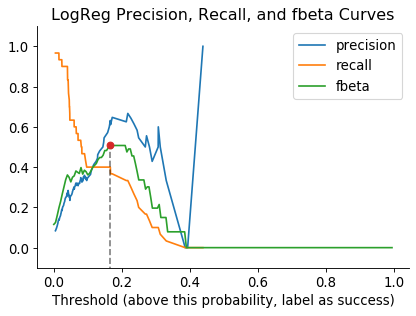

In [802]:
# Calculate fbeta for logistic regression and plot precision recall curve
all_fbeta_lr, best_fbeta_lr = fbeta_and_plot(modelName='LogReg',
                                             model=logreg,
                                             yt=y_test,
                                             Xt=X_test_scaled,
                                             note='init')

**Look at the features**

See which features had the highest coefficients

In [771]:
# Look at coefficients for this model
lr_coefs = list(zip(X.columns.astype(str), logreg.coef_[0]))
lr_coefs_df = pd.DataFrame(lr_coefs)
lr_top_coefs = [x for x in lr_coefs if np.abs(x[1]) > .01]
lr_top_coefs = sorted(lr_top_coefs, key=(lambda x: x[1]), reverse=True)
lr_top_coefs_df = pd.DataFrame(lr_top_coefs)
lr_top_coefs_df.to_csv('data/lr_coefs.csv')

In [772]:
lr_top_coefs

[('0', 0.6849017425056624),
 ('rating', 0.302930635548082),
 ('cat_Sushi Bars', 0.29349469568093395),
 ('reviewCount', 0.15473665352562638),
 ('city_Napa', 0.10685412758334357),
 ('5', 0.10133865510781023),
 ('parking_valet', 0.08969176256017662),
 ('15', 0.08825465473651067),
 ('city_San Mateo', 0.07773888165179578),
 ('price_highest', 0.07210034187503944),
 ('cat_Mediterranean', 0.058537828505876806),
 ('cat_Latin American', 0.05667335614507225),
 ('cat_Pizza', 0.04913659042506654),
 ('filReviewCount', 0.03625793729894906),
 ('17', 0.03609035484035541),
 ('alc_beer_wine', 0.02863503596396758),
 ('10', 0.020476174922326305),
 ('city_Pasadena', 0.020284101916918873),
 ('16', 0.018129178949643655),
 ('12', 0.016500376759099183),
 ('city_Costa Mesa', -0.010293634058308146),
 ('city_Anaheim', -0.01232353218000923),
 ('fancy_bin', -0.03129187676256627),
 ('8', -0.032490617107536125),
 ('7', -0.03667747073199744),
 ('city_Oakland', -0.0469327044070312),
 ('cat_Bars', -0.049524134738431695),
 ('city_Laguna Beach', -0.05532352202662469),
 ('cat_French', -0.0648318453171725),
 ('wheelchair_bin', -0.07012607276941366),
 ('goodforkids_bin', -0.07675340402244912),
 ('tv_bin', -0.08415721424809737),
 ('major_city', -0.09017113802163862),
 ('takeout_bin', -0.10629197615898409),
 ('outdoor_bin', -0.11172741652268713),
 ('goodforgroups_bin', -0.2167409010722615),
 ('4', -0.2903938338971343),
 ('1', -0.39533722859153647)]

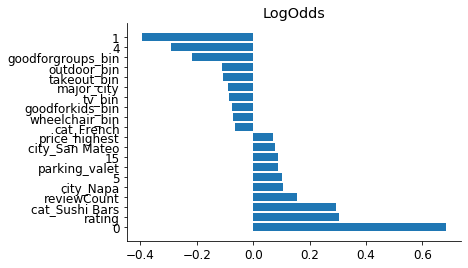

In [707]:
plt.barh([x[0] for x in lr_top_coefs], width=[x[1] for x in lr_top_coefs])
plt.title('LogOdds')
plt.grid(b=False)
sns.despine()

**Calculate ROC Curve for model comparison and AUC**

In [708]:
fpr_lr, tpr_lr, thresholds_lr, auc_lr = roc_auc(logreg,
                                                yt=y_test,
                                                Xt=X_test_scaled)
print('AUC score for initial logistic regression model = ', auc_lr)

AUC score for initial logistic regression model =  0.8717734447539461


<a class="anchor" id="xgb1"></a>
### XGBoost
Similar to other tree based algorithms but it uses boosting to calculate each subsequent tree which is necessarily sequential and thus takes longer to run since it cannot be parallelized

In [762]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

**Evaluate the model**

/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Probability that yields the best fbeta score is 0.31 with fbeta=0.482315


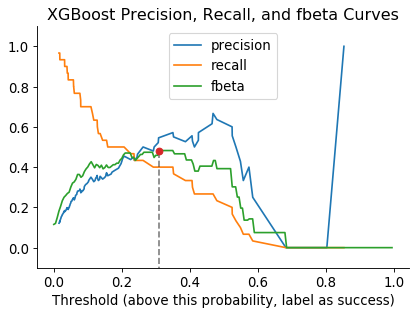

In [803]:
# Calculate fbeta for XGBoost and plot precision recall curve
all_fbeta_xgb, best_fbeta_xgb = fbeta_and_plot(modelName='XGBoost',
                                               model=xgb,
                                               yt=y_test,
                                               Xt=X_test,
                                               note='init')

**Look at the features**

In [711]:
xgb_feats = sorted(list(zip(X.columns, xgb.feature_importances_)),
                   key=(lambda x: x[1]),
                   reverse=True)

In [712]:
xgb_feats[0:10]

[(1, 0.06948301),
 (0, 0.058648832),
 ('cat_American (New)', 0.039218467),
 ('reviewCount', 0.038050395),
 ('filReviewCount', 0.035441056),
 (3, 0.030804204),
 (4, 0.028593209),
 (13, 0.028164942),
 ('outdoor_bin', 0.028139446),
 ('price_highest', 0.02685111)]

**Calculate ROC Curve for model comparison and AUC**

In [713]:
fpr_xgb, tpr_xgb, thresholds_xgb, auc_xgb = roc_auc(xgb, yt=y_test, Xt=X_test)
print('AUC score for initial XGBoost model = ', auc_xgb)

AUC score for initial XGBoost model =  0.8774373259052926


**Look at shap values to get a sense for directionality of the feature importances**

In [714]:
shap.initjs()
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)
# shap.summary_plot(shap_values, X_train, plot_type="bar")
shap.force_plot(explainer.expected_value, shap_values[0, :], X.iloc[0, :])

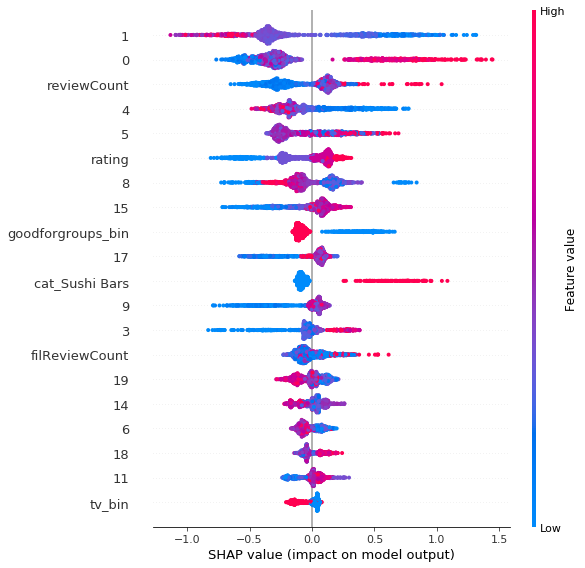

In [715]:
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

<a class="anchor" id="modelcomp"></a>
## Model Comparison
Look at the ROC curves for each of the models to determine which performs best

In [716]:
models = ['lr', 'xgb']
model_aucs = [
    auc_lr,
    auc_xgb,
]
model_fbetas = [best_fbeta_lr[1], best_fbeta_xgb[1]]
model_names = [
    'Logistic Regression',
    'XGBoost',
]

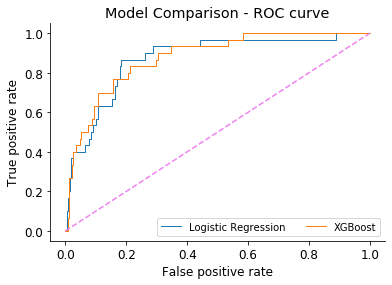

In [717]:
# Plot ROC Curves

plt.plot(fpr_lr, tpr_lr, lw=1, label='Logistic Regression')
plt.plot(fpr_xgb, tpr_xgb, lw=1, label='XGBoost')

plt.plot([0, 1], [0, 1], c='violet', ls='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Model Comparison - ROC curve')
plt.legend(ncol=2, fontsize='small')
sns.despine()
plt.savefig('img/model_comp_roc.svg')
plt.savefig('img/model_comp_roc.png')

They perform similarly well. Since the target class is imbalanced, let's try upsampling to see if that improves performance

<a id='ups'></a>
## Modeling with Upsampling
The target classes are highly imbalanced - try upsampling with several techniques to try to increase model performance

In [718]:
y.value_counts()

0    1792
1     152
Name: michelin_star, dtype: int64

There is nearly a 10:1 ratio for target classes. (10X more restaurants that are not in the Michelin Guide than are)

<a id='ros'></a>
### Upsample with Random Oversampling
The first method we will try is random oversampling, which will add additional points to the minority class in random locations until the classes are evenly balanced

In [720]:
ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_sample(X_train, y_train)

In [721]:
# Standardize the data

scaler_ros = StandardScaler()

# Fit the scaler using the training data and scale it
X_train_ros_scaled = pd.DataFrame(scaler_ros.fit_transform(X_train_ros),
                                  columns=X.columns)

# Scale the test data
X_test_scaled_ros = pd.DataFrame(scaler_ros.transform(X_test.values),
                                 columns=X.columns)

<a id='lr-ros'></a>
### Logistic Regression with Random Upsampling

In [722]:
# Instantiate model
logreg_ros = LogisticRegression(C=.10,
                                solver='saga',
                                penalty='elasticnet',
                                l1_ratio=0.7,
                                max_iter=800)

# Fit model to the training data
logreg_ros.fit(X_train_ros_scaled, y_train_ros)

# Pickle this for later
joblib.dump(logreg_ros, 'logreg_ros.pkl')

**Evaluate the model**

Probability that yields the best fbeta score is 0.335 with fbeta=0.670103


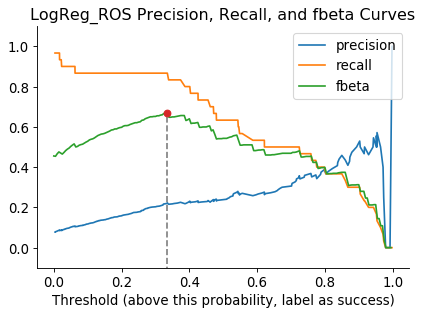

In [723]:
all_fbeta_lr_ros, best_fbeta_lr_ros = fbeta_and_plot(modelName='LogReg_ROS',
                                                     model=logreg_ros,
                                                     yt=y_test,
                                                     Xt=X_test_scaled_ros,
                                                     note='ros')

In [724]:
# Store coefficients
lr_coefs_ros = list(zip(X.columns.astype(str), logreg_ros.coef_[0]))
lr_coefs_ros_df = pd.DataFrame(lr_coefs_ros)
lr_top_coefs_ros = [x for x in lr_coefs_ros if np.abs(x[1]) > .001]
lr_top_coefs_ros = sorted(lr_top_coefs_ros, key=(lambda x: x[1]), reverse=True)
lr_top_coefs_ros_df = pd.DataFrame(lr_top_coefs_ros)
lr_top_coefs_ros_df.to_csv('data/lr_coefs_ros.csv')

**Calculate ROC Curve for model comparison and AUC**

In [725]:
fpr_lr_ros, tpr_lr_ros, thresholds_lr_ros, auc_lr_ros = roc_auc(
    logreg_ros, yt=y_test, Xt=X_test_scaled_ros)
print('AUC score for logistic regression model with random oversampling = ',
      auc_lr_ros)

AUC score for logistic regression model with random oversampling =  0.8100278551532033


<a id='xgb-ros'></a>
### XGBoost with Random Oversampling

In [726]:
xgb_ros = XGBClassifier()
xgb_ros.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

**Evaluate the model**

In [727]:
# Calculate fbeta for XGBoost
prob_thresholds = np.arange(0, 1, 0.005)
fbeta_xgb_ros = []
for prob in prob_thresholds:
    fbeta_xgb_ros.append(
        fbeta_score(y_test,
                    xgb_ros.predict_proba(np.array(X_test))[:, 1] > prob, 3))
all_fbeta_xgb_ros = list(zip(prob_thresholds, fbeta_xgb_ros))
best_fbeta_xgb_ros = max(list(zip(prob_thresholds, fbeta_xgb_ros)),
                         key=lambda x: x[1])
print('Probability that yields the best fbeta score is {} with fbeta={:5f}'.
      format(best_fbeta_xgb_ros[0], best_fbeta_xgb_ros[1]))

# Calculate ROC Score and AUC for Naive Bayes Gaussian
fpr_xgb_ros, tpr_xgb_ros, thresholds_xgb_ros = roc_curve(
    y_test,
    xgb_ros.predict_proba(np.array(X_test))[:, 1])  # not scaled for xgboost
auc_xgb_ros = roc_auc_score(
    y_test,
    xgb_ros.predict_proba(np.array(X_test))[:, 1])  # not scaled for xgboost

Probability that yields the best fbeta score is 0.22 with fbeta=0.654450


/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [728]:
print('AUC for XGBoost with Random Oversampling = ', auc_xgb_ros)

AUC for XGBoost with Random Oversampling =  0.8429897864438255


Random Oversampling worsened the model performance. Now try SMOTE and ADASYN

<a id='sm'></a>
### Upsample with SMOTE
SMOTE works differently, trying to add more data to the minority class in the areas where the data is closest to data from the minority class

In [729]:
X_train_sm, y_train_sm = SMOTE(random_state=42).fit_sample(X_train, y_train)

In [730]:
# Standardize the data

scaler_sm = StandardScaler()

# Fit the scaler using the training data and scale it
X_train_sm_scaled = pd.DataFrame(scaler_sm.fit_transform(X_train_sm),
                                 columns=X.columns)

# Scale the test data
X_test_scaled_sm = pd.DataFrame(scaler_sm.transform(X_test.values),
                                columns=X.columns)

<a id='lr-sm'></a>
### Logistic Regression with SMOTE

In [731]:
# Instantiate model
logreg_sm = LogisticRegression(C=.10,
                               solver='saga',
                               penalty='elasticnet',
                               l1_ratio=0.7,
                               max_iter=800)

# Fit model to the training data
logreg_sm.fit(X_train_sm_scaled, y_train_sm)

# Pickle this for later
joblib.dump(logreg_sm, 'logreg_sm.pkl')

**Evaluate the model**

Probability that yields the best fbeta score is 0.28 with fbeta=0.644330


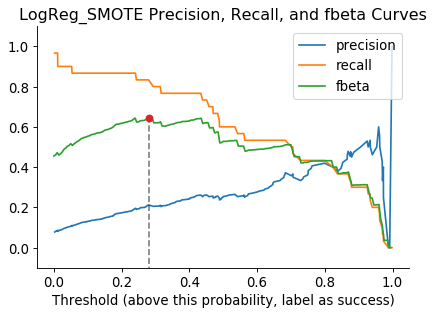

In [732]:
all_fbeta_lr_sm, best_fbeta_lr_sm = fbeta_and_plot(modelName='LogReg_SMOTE',
                                                   model=logreg_sm,
                                                   yt=y_test,
                                                   Xt=X_test_scaled_sm,
                                                   note='smote')

**Calculate ROC Curve for model comparison and AUC**

In [733]:
fpr_lr_sm, tpr_lr_sm, thresholds_lr_sm, auc_lr_sm = roc_auc(
    logreg_sm, yt=y_test, Xt=X_test_scaled_sm)
print('AUC score for logistic regression model with SMOTE = ', auc_lr_sm)

AUC score for logistic regression model with SMOTE =  0.8091922005571031


<a id='xgb-sm'></a>
### XGBoost with SMOTE

In [734]:
xgb_sm = XGBClassifier()
xgb_sm.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

**Evaluate the model**

In [805]:
# Calculate fbeta for XGBoost
prob_thresholds = np.arange(0, 1, 0.005)
fbeta_xgb_sm = []
for prob in prob_thresholds:
    fbeta_xgb_sm.append(
        fbeta_score(y_test,
                    xgb_sm.predict_proba(np.array(X_test))[:, 1] > prob, 3))
all_fbeta_xgb_sm = list(zip(prob_thresholds, fbeta_xgb_sm))
best_fbeta_xgb_sm = max(list(zip(prob_thresholds, fbeta_xgb_sm)),
                        key=lambda x: x[1])
print('Probability that yields the best fbeta score is {} with fbeta={:5f}'.
      format(best_fbeta_xgb_sm[0], best_fbeta_xgb_sm[1]))

# Calculate ROC Score and AUC for Naive Bayes Gaussian
fpr_xgb_sm, tpr_xgb_sm, thresholds_xgb_sm = roc_curve(
    y_test,
    xgb_sm.predict_proba(np.array(X_test))[:, 1])  # not scaled for xgboost
auc_xgb_sm = roc_auc_score(
    y_test,
    xgb_sm.predict_proba(np.array(X_test))[:, 1])  # not scaled for xgboost

Probability that yields the best fbeta score is 0.095 with fbeta=0.668449


/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [736]:
print('AUC for XGBoost with SMOTE = ', auc_xgb_sm)

AUC for XGBoost with SMOTE =  0.8392757660167132


f_beta score increased somewhat with smote with XGBoost. Now try upsampling with ADASYN

<a id='ad'></a>
### Upsample with ADASYN

In [738]:
X_train_ad, y_train_ad = ADASYN(random_state=42).fit_sample(X_train, y_train)

In [741]:
# Standardize the data

scaler_ad = StandardScaler()

# Fit the scaler using the training data and scale it
X_train_ad_scaled = pd.DataFrame(scaler_ad.fit_transform(X_train_ad),
                                 columns=X.columns)

# Scale the test data
X_test_scaled_ad = pd.DataFrame(scaler_ad.transform(X_test.values),
                                columns=X.columns)

<a id='lr-ad'></a>
### Logistic Regression with ADASYN

In [742]:
# Instantiate model
logreg_ad = LogisticRegression(C=.10,
                               solver='saga',
                               penalty='elasticnet',
                               l1_ratio=0.7,
                               max_iter=800)

# Fit model to the training data
logreg_ad.fit(X_train_ad_scaled, y_train_ad)

# Pickle this for later
joblib.dump(logreg_ad, 'logreg_ad.pkl')

**Evaluate the model**

Probability that yields the best fbeta score is 0.895 with fbeta=0.442122


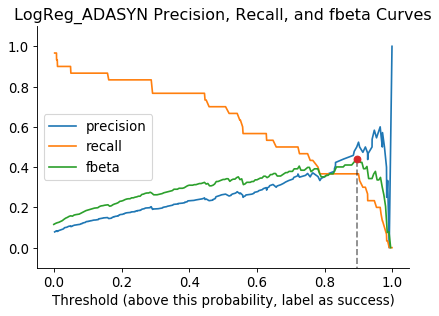

In [804]:
all_fbeta_lr_ad, best_fbeta_lr_ad = fbeta_and_plot(modelName='LogReg_ADASYN',
                                                   model=logreg_ad,
                                                   yt=y_test,
                                                   Xt=X_test_scaled_ad,
                                                   note='adasyn')

**Calculate ROC Curve for model comparison and AUC**

In [744]:
fpr_lr_ad, tpr_lr_ad, thresholds_lr_ad, auc_lr_ad = roc_auc(
    logreg_ad, yt=y_test, Xt=X_test_scaled_ad)
print('AUC score for logistic regression model with ADASYN = ', auc_lr_ad)

AUC score for logistic regression model with ADASYN =  0.8034354688950789


<a id='xgb-lr'></a>
### XGBoost with ADASYN

In [746]:
xgb_ad = XGBClassifier()
xgb_ad.fit(X_train_ad, y_train_ad)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

**Evaluate the model**

In [748]:
# Calculate fbeta for XGBoost
prob_thresholds = np.arange(0, 1, 0.005)
fbeta_xgb_ad = []
for prob in prob_thresholds:
    fbeta_xgb_ad.append(
        fbeta_score(y_test,
                    xgb_ad.predict_proba(np.array(X_test))[:, 1] > prob, 3))
all_fbeta_xgb_ad = list(zip(prob_thresholds, fbeta_xgb_ad))
best_fbeta_xgb_ad = max(list(zip(prob_thresholds, fbeta_xgb_ad)),
                        key=lambda x: x[1])
print('Probability that yields the best fbeta score is {} with fbeta={:5f}'.
      format(best_fbeta_xgb_ad[0], best_fbeta_xgb_ad[1]))

# Calculate ROC Score and AUC for Naive Bayes Gaussian
fpr_xgb_ad, tpr_xgb_ad, thresholds_xgb_ad = roc_curve(
    y_test,
    xgb_ad.predict_proba(np.array(X_test))[:, 1])  # not scaled for xgboost
auc_xgb_ad = roc_auc_score(
    y_test,
    xgb_ad.predict_proba(np.array(X_test))[:, 1])  # not scaled for xgboost

Probability that yields the best fbeta score is 0.08 with fbeta=0.666667


/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [749]:
auc_xgb_ad

0.8518105849582173

<a id='modelcomp-ups'></a>
### Upsampled Model Comparison

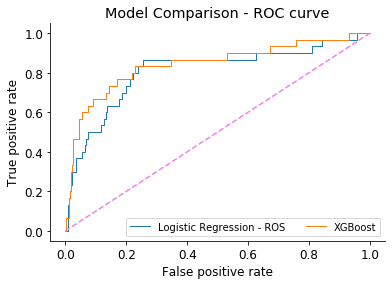

In [750]:
# Plot ROC Curves

plt.plot(fpr_lr_ros, tpr_lr_ros, lw=1, label='Logistic Regression - ROS')
plt.plot(fpr_xgb_ros, tpr_xgb_ros, lw=1, label='XGBoost')

plt.plot([0, 1], [0, 1], c='violet', ls='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Model Comparison - ROC curve')
plt.legend(ncol=2, fontsize='small')
sns.despine()
# plt.savefig('img/model_comp_roc.svg')
# plt.savefig('img/model_comp_roc.png')

<a id='tuning'></a>
## Tuning and Cross-Validating the Models
<a id='xgb-tune'></a>
### Tuning XGBoost

In [751]:
param_grid = {
    "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]
}

In [753]:
xgb_grid = GridSearchCV(XGBClassifier(),
                        param_grid=param_grid,
                        n_jobs=-1,
                        scoring='recall')

In [754]:
xgb_grid.fit(X_train, y_train)

/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0,...
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.05

In [755]:
xgb_grid_best = xgb_grid.best_estimator_

In [756]:
xgb_grid_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
              learning_rate=0.25, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [765]:
# Set up parameters for gridsearch
param_grid2 = {
    "learning_rate": [0.05, 0.10, 0.15],
    "max_depth": [3, 6, 9],
    "min_child_weight": [1, 3],
    "gamma": [0.0, 0.1],
    "colsample_bytree": [0.5, 0.7, 0.9],
    "n_estimators": [100, 500]
}

# Create custom scorer for gridsearchcv
f3_scorer = make_scorer(fbeta_score, beta=3)

In [766]:
xgb_grid2 = GridSearchCV(XGBClassifier(),
                         param_grid=param_grid,
                         n_jobs=-1,
                         scoring=f3_scorer,
                         cv=kf)
xgb_grid2.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=40, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='bina...
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 

In [793]:
# What were the optimum parameters
xgb_grid2.best_estimator_
# max_depth = 5
# learning_rate = 0.3
# n_estimators = 100
# min_child_weight = 7
# gamma = 0
# colsample_bytree = 0.4

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [792]:
xgb_grid2_best = xgb_grid2.best_estimator_

# Save for later
pickle.dump(xgb_grid2_best, open("xgb_grid.pkl", "wb"))

# To load
# xgb_grid2_best = pickle.load(open("xgb_grid.pkl", "rb"))

/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Probability that yields the best fbeta score is 0.11 with fbeta=0.443633


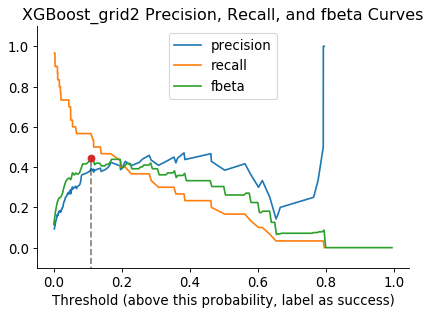

In [806]:
all_fbeta_xgb_grid2_best, best_fbeta_xgb_grid2_best = fbeta_and_plot(
    modelName='XGBoost_grid2',
    model=xgb_grid2_best,
    yt=y_test,
    Xt=X_test,
    note='grid2')

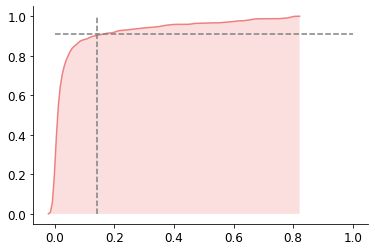

In [889]:
fig = plt.figure()
sns.kdeplot([x[1] for x in xgb_grid2_best.predict_proba(X_test).round(2)],
            shade=True,
            color='lightcoral',
            cumulative=True)
plt.plot([0, 1], [0.91, 0.91], '--', color='grey')
plt.plot([.14, .14], [0, 1], '--', color='grey')
sns.despine()
fig.savefig('img/kde.png', transparent=True)

**Look at feature importances**

In [773]:
xgb_grid2_best_feats = sorted(list(
    zip(X.columns, xgb_grid2_best.feature_importances_)),
                              key=(lambda x: x[1]),
                              reverse=True)

In [783]:
# Non-zero features
xgb_grid2_best_feats[0:39]

[(1, 0.0704154),
 (0, 0.05588353),
 ('price_highest', 0.037607912),
 ('rating', 0.037478056),
 ('filReviewCount', 0.035650067),
 ('cat_Sushi Bars', 0.035046116),
 ('city_San Francisco', 0.034781005),
 ('cat_French', 0.03332455),
 (3, 0.03090445),
 (5, 0.028181398),
 ('goodforgroups_bin', 0.027124774),
 (13, 0.026830094),
 (4, 0.026476972),
 (18, 0.025827738),
 (19, 0.024747185),
 ('rating_bin', 0.02432383),
 ('wheelchair_bin', 0.024292177),
 (9, 0.023851808),
 (8, 0.023749998),
 ('reviewCount', 0.023678238),
 (15, 0.023651492),
 (12, 0.023405625),
 ('outdoor_bin', 0.022961088),
 ('takeout_bin', 0.022731258),
 ('cat_American (New)', 0.021017987),
 (7, 0.020226248),
 (2, 0.01998256),
 (17, 0.019677393),
 (14, 0.019430589),
 (6, 0.019395452),
 (11, 0.01897118),
 ('tv_bin', 0.018782616),
 ('alc_beer_wine', 0.018725274),
 ('fancy_bin', 0.017553763),
 (16, 0.013810199),
 (10, 0.013761184),
 ('alc_full_bar', 0.013576871),
 ('major_city', 0.011165601),
 ('parking_valet', 0.010998267)]

**Look at SHAP values**

In [788]:
shap.initjs()
explainer = shap.TreeExplainer(xgb_grid2_best)
shap_values = explainer.shap_values(X_train)
# shap.summary_plot(shap_values, X_train, plot_type="bar")
shap.force_plot(explainer.expected_value, shap_values[0, :], X.iloc[0, :])

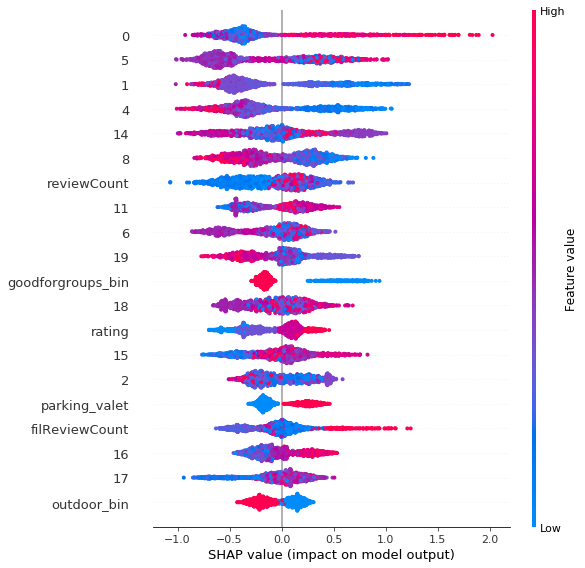

In [789]:
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

<a id='sandbox'></a>
## SANDBOX
All material below is mostly unfinished
<a id='nn'></a>
### Classify with Neural Networks

In [325]:
logreg_keras = keras.Sequential([
    keras.layers.Dense(
        units=10,
        input_shape=(93, )),  # unit is dimensionality of the output space
    keras.layers.Activation("relu", name="hidden_activation"),
    keras.layers.Dense(units=1),
    keras.layers.Activation(
        "sigmoid"
    )  # typical sigmoid is centered at 0, everything gets transformed by this function
    # very positive will be on right side of sigmoid, closer to 1
])

logreg_keras.compile(optimizer="nadam", loss="binary_crossentropy")

logreg_keras.fit(x=X_train_scaled, y=y_train, epochs=30)

Epoch 1/30
1499/1499 [==============================] - 3s 2ms/step - loss: 0.5280
Epoch 2/30
1499/1499 [==============================] - 0s 125us/step - loss: 0.3272
Epoch 3/30
1499/1499 [==============================] - 0s 130us/step - loss: 0.2506
Epoch 4/30
1499/1499 [==============================] - 0s 141us/step - loss: 0.2168
Epoch 5/30
1499/1499 [==============================] - 0s 131us/step - loss: 0.1985
Epoch 6/30
1499/1499 [==============================] - 0s 120us/step - loss: 0.1848
Epoch 7/30
1499/1499 [==============================] - 0s 138us/step - loss: 0.1750
Epoch 8/30
1499/1499 [==============================] - 0s 142us/step - loss: 0.1671
Epoch 9/30
1499/1499 [==============================] - 0s 187us/step - loss: 0.1602
Epoch 10/30
1499/1499 [==============================] - 0s 156us/step - loss: 0.1547
Epoch 11/30
1499/1499 [==============================] - 0s 127us/step - loss: 0.1501
Epoch 12/30
1499/1499 [==============================] - 0s 139us

In [326]:
# Calculate fbeta for keras
prob_thresholds = np.arange(0, 1, 0.005)
fbeta_keras = []
for prob in prob_thresholds:
    fbeta_keras.append(
        fbeta_score(y_test,
                    logreg_keras.predict_proba(X_test_scaled) > prob, 3))
all_fbeta_keras = list(zip(prob_thresholds, fbeta_keras))
best_fbeta_keras = max(list(zip(prob_thresholds, fbeta_keras)),
                       key=lambda x: x[1])
print('Probability that yields the best fbeta score is {} with fbeta={:5f}'.
      format(best_fbeta_keras[0], best_fbeta_keras[1]))

Probability that yields the best fbeta score is 0.005 with fbeta=0.612691


### Example for Presenting Concept
Restaurant = Bullion in Dallas, TX

In [866]:
# Features
X_bullion = [
    247, 4.5, 12, 0.85008134, -0.12656982, 0.04557796, 0.87393609, -0.02667111,
    0.184407, -0.18908966, -0.03081288, -0.05425768, 0.01228452, 0.03264471,
    0.00196892, -0.10826143, -0.03573562, -0.0605818, 0.03982949, -0.07230415,
    0.08661016, -0.01234881, 0.08003016, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
    1, 0, 0, 1, 0, 0, 1, 1
]

In [867]:
X_bullion_df = pd.DataFrame(X_bullion)  #,columns = X_test.columns)
X_bullion_df = X_bullion_df.transpose()
X_bullion_df.columns = X_test.columns

In [868]:
X_bullion_df

,reviewCount,rating,filReviewCount,0,1,2,3,4,5,6,...,wheelchair_bin,parking_self_park,parking_valet,price_highest,alc_beer_wine,alc_full_bar,noise_loud,noise_quiet,intercept,rating_bin
0,247.0,4.5,12.0,0.850081,-0.12657,0.045578,0.873936,-0.026671,0.184407,-0.18909,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [869]:
xgb_grid2_best.predict_proba(X_bullion_df)

array([[0.7271612 , 0.27283877]], dtype=float32)